# Support Vector Machine (SVM) – Persian Digit Classification

This notebook demonstrates the use of **Support Vector Machines (SVM)** for classifying handwritten Persian digits using the **HODA dataset**. The goal is to explore how SVMs can separate classes with both linear and non-linear decision boundaries, and to practice **model selection via custom grid search**.

**Key Steps:**

1. **Data preparation** – Load HODA dataset and preprocess images.
2. **Custom grid search** – Experiment with different SVM parameters:

   * **Regularization (C):** 0.01, 1, 100
   * **Kernel types:** `linear` and `rbf`
   * **Training sample sizes:** 10,000 and 20,000
3. **Model training and evaluation** – Train SVM models with all parameter combinations and compare performance using accuracy.
4. **Selecting the best model** – Choose the model with the highest validation performance.
5. **Prediction on new data** – Test the model on a single sample of handwritten digit from your own handwriting.

**Goal:**
To understand how SVM hyperparameters affect model performance, observe the trade-offs between linear and non-linear kernels, and experience the complete workflow from dataset preprocessing to prediction on unseen samples.


In [21]:
import sys
import os

import matplotlib.pyplot as plt
import pandas as pd
import cv2
import numpy as np
from time import perf_counter
from sklearn.svm import SVC
sys.path.append(os.path.abspath('../data/hoda-dataset-reader'))
from HodaDatasetReader import read_hoda_dataset

In [10]:
x_train, y_train = read_hoda_dataset("../data/hoda-dataset-reader/DigitDB/Train 60000.cdb")
x_test, y_test = read_hoda_dataset("../data/hoda-dataset-reader/DigitDB/Test 20000.cdb")

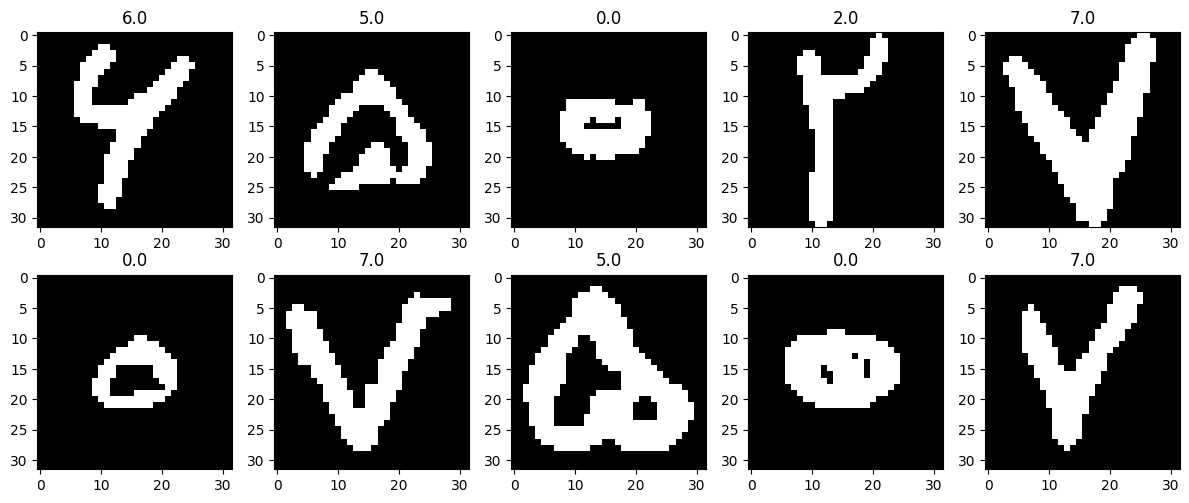

In [11]:
# getting a sense of what we are working with
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i].reshape(32, 32), cmap='gray')
    plt.title(y_train[i])
    
plt.tight_layout()
plt.show()

In [16]:
kernel = ['linear', 'rbf']
regularization = [0.01, 1, 100]
n_sample = [10000, 20000]

results = []
for n in n_sample:
    for k in kernel:
        for c in regularization:
            training_time_start = perf_counter()
            svc = SVC(kernel=k, C=c)
            svc.fit(x_train[:n], y_train[:n])
            training_time_end = perf_counter()
            
            train_time = training_time_end - training_time_start
            train_acc = svc.score(x_train[:n], y_train[:n]) * 100
            
            test_time_start = perf_counter()
            test_acc = svc.score(x_test, y_test)
            test_time_end = perf_counter()
            test_time = test_time_end - test_time_start
            
            results.append({
                "Kernel": k,
                "C (Regularization)": c,
                "Samples": n,
                "Training Time (s)": f"{train_time:.4f}",
                "Training Accuracy (%)": f"{train_acc:.2f}",
                "Testing Time (s)": f"{test_time:.4f}",
                "Testing Accuracy (%)": f"{test_acc:.2f}"
            })

In [ ]:
df = pd.DataFrame(results)

markdown_table = df.to_markdown(index=False)
print(markdown_table)

| Kernel   |   C (Regularization) |   Samples |   Training Time (s) |   Training Accuracy (%) |   Testing Time (s) |   Testing Accuracy (%) |
|:---------|---------------------:|----------:|--------------------:|------------------------:|-------------------:|-----------------------:|
| linear   |                 0.01 |     10000 |              4.3996 |                   98.16 |            24.4924 |                   0.93 |
| linear   |                 1    |     10000 |              6.3709 |                  100    |            22.7869 |                   0.93 |
| linear   |               100    |     10000 |              6.2652 |                  100    |            22.3595 |                   0.93 |
| rbf      |                 0.01 |     10000 |             70.5211 |                   88.27 |           143.992  |                   0.79 |
| rbf      |                 1    |     10000 |              9.2832 |                   99.35 |            45.3061 |                   0.96 |
| rbf      |               100    |     10000 |              9.2996 |                  100    |            45.7852 |                   0.96 |
| linear   |                 0.01 |     20000 |             19.517  |                   98.02 |            33.176  |                   0.94 |
| linear   |                 1    |     20000 |             17.2694 |                  100    |            28.6005 |                   0.93 |
| linear   |               100    |     20000 |             17.3492 |                  100    |            28.3431 |                   0.93 |
| rbf      |                 0.01 |     20000 |            198.069  |                   91.59 |           230.608  |                   0.83 |
| rbf      |                 1    |     20000 |             30.3879 |                   99.38 |            70.4293 |                   0.97 |
| rbf      |               100    |     20000 |             29.3622 |                  100    |            71.8408 |                   0.97 |


In [19]:
svc = SVC(kernel='rbf', C=100)
svc.fit(x_train[:20000], y_train[:20000])

,C,100
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [22]:
image = cv2.imread("../data/hoda-dataset-reader/my-own-handwritten-digit.jpg", cv2.IMREAD_GRAYSCALE)
image_resized = cv2.resize(image, (32, 32), interpolation=cv2.INTER_CUBIC)
image_normalized = image_resized / 255.0
image_binarized = np.where(image_normalized >= 0.5, 1, 0)
image_flattened = image_binarized.reshape(1, -1)

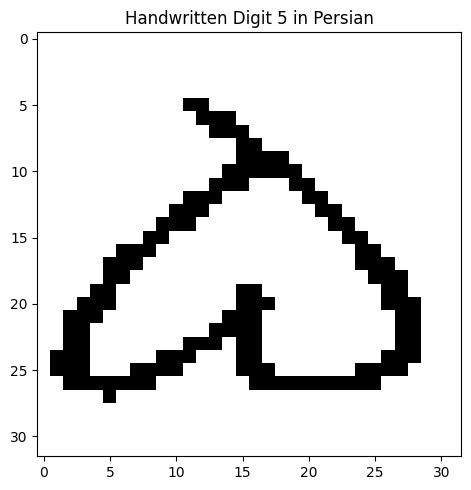

In [25]:
plt.figure(figsize=(12, 5))
plt.imshow(image_flattened.reshape(32, 32), cmap='gray')
plt.title("Handwritten Digit 5 in Persian")
    
plt.tight_layout()
plt.show()

In [23]:
predicted_label = svc.predict(image_flattened)
print(f"My handwriting is detected as: {predicted_label[0]}")

My handwriting is detected as: 5.0
